# Data Sampling
An introduction to deterministic and probabilistic sampling.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import libraries
from __future__ import absolute_import, division, print_function

# Ignore warnings
import warnings
#warnings.filterwarnings('ignore')

import sys
sys.path.append('tools/')

import numpy as np
import pandas as pd

# Graphing Libraries
import matplotlib.pyplot as pyplt
import seaborn as sns
sns.set_style("white")  

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

from IPython.display import display

To get our feet wet, let's take a look at the city of San Francisco's bike sharing data

In [3]:
trips = pd.read_csv('data/trip.csv')
commute = trips.where(trips.Duration < 1800)

In [4]:
display(trips.head())
display(commute.head())

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460.0,765.0,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50.0,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70.0,288.0,Subscriber,2139
1,913459.0,1036.0,8/31/2015 23:11,San Antonio Shopping Center,31.0,8/31/2015 23:28,Mountain View City Hall,27.0,35.0,Subscriber,95032
2,913455.0,307.0,8/31/2015 23:13,Post at Kearny,47.0,8/31/2015 23:18,2nd at South Park,64.0,468.0,Subscriber,94107
3,913454.0,409.0,8/31/2015 23:10,San Jose City Hall,10.0,8/31/2015 23:17,San Salvador at 1st,8.0,68.0,Subscriber,95113
4,913453.0,789.0,8/31/2015 23:09,Embarcadero at Folsom,51.0,8/31/2015 23:22,Embarcadero at Sansome,60.0,487.0,Customer,9069


For this analysis, we are limiting ourselves to bike sharing trips that are leess that 30 minutes, because that is what comes free as part of the bike sharing program for the city of San Francisco.
We want to draw a histogram of the duration to understand exactly how long trips typically take. 

To do that, I am going to start off making bins of the data. For example, restricting the sampling to every minutes.

In [5]:
half_hour = 30 * 60 # 30 minutes times 60 seconds
bins = np.arange(1, half_hour+1, 60)

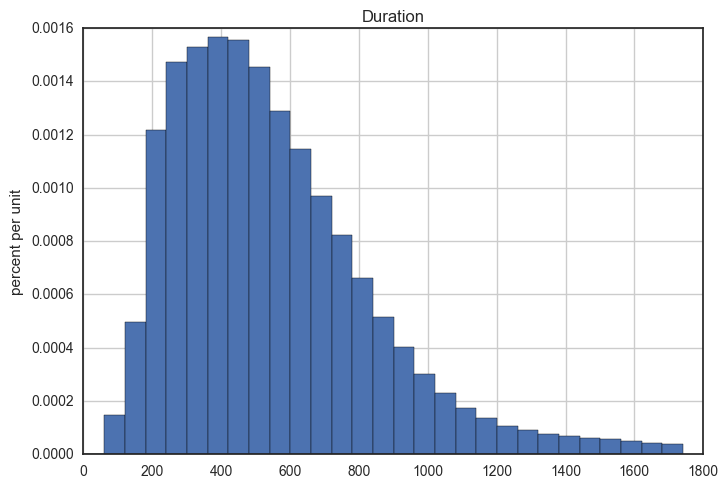

In [198]:
commute.hist('Duration', bins=bins, normed=True)
pyplt.ylabel('percent per unit');

In [178]:
def bin_frequency(k):
    bins = np.arange(1, half_hour+1, k)
    commute.hist('Duration', bins=bins, normed=True)

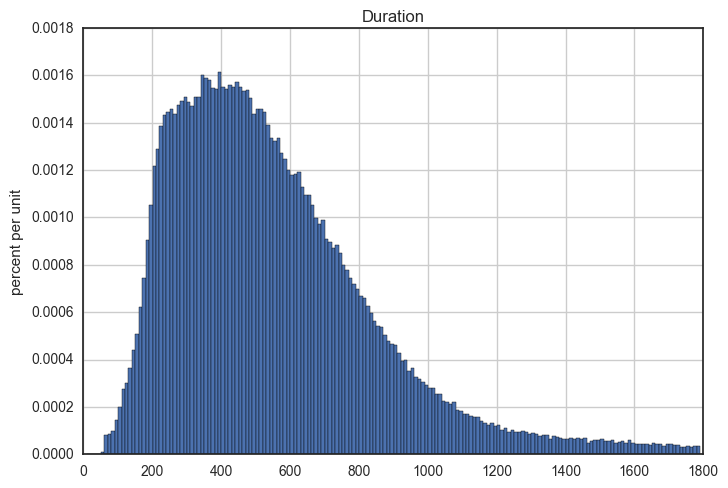

In [197]:
bin_frequency(10)
pyplt.ylabel('percent per unit');

In [9]:
weather = pd.read_csv('data/weather.csv')
sf = weather.where(weather.Zip == 94107)

In [10]:
sf = sf[[0, 1, 3]]
sf.columns = [u'PDT', 'High', 'Low']

In [11]:
sf.head()

,PDT,High,Low
0,9/1/2014,83.0,57.0
1,9/2/2014,72.0,60.0
2,9/3/2014,76.0,61.0
3,9/4/2014,74.0,61.0
4,9/5/2014,72.0,60.0


In [12]:
def axis_tick_frequency(ax, axis, freq):
    """The frequency of the y axis tick marks
        Attributes
        ----------
        ax: matplotlib axis object
        axis: char eithher 'y' or 'x'
        freq: int, the integer value of which the range moves
    """
    
    if axis == 'y':
        start, end = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(start, end, freq))
    elif axis == 'x':
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, freq))
    else:
        raise ValueError('{argument} is not a valid axis object'.format(argument=repr(axis)))

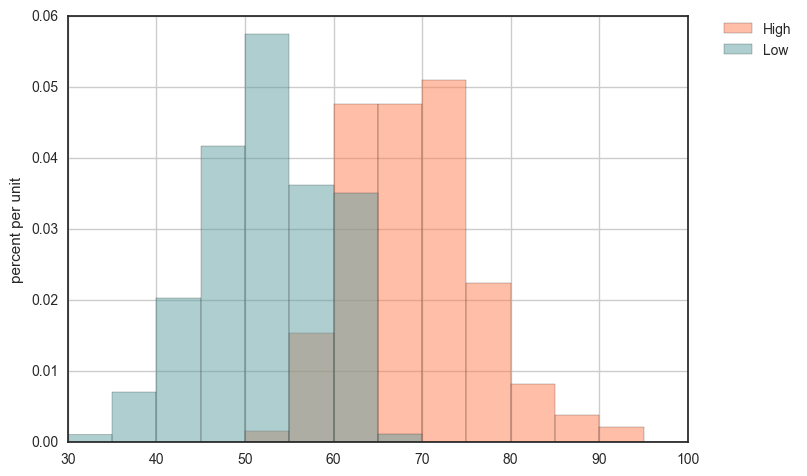

In [195]:
ax = sf[[1,2]].plot.hist(color =['coral','cadetblue'], bins=np.arange(30, 101, 5), normed=True, alpha = 0.5)
#axis_tick_frequency(ax, 'y', 10)
pyplt.ylabel('percent per unit')
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplt.grid(True);

#### Question:
 - What proportion of days had a low temp greater than 45 degrees?
 
#### Answer:



In [14]:
sf.where(sf.Low >= 45).Low.count() / 365 * 100

85.753424657534254

#### Question:
 - Figure out the distribution of the days of the year where temperature swings betweens the highs and the lows.

#### Answer:

In [15]:
sf['diff'] = sf.High - sf.Low

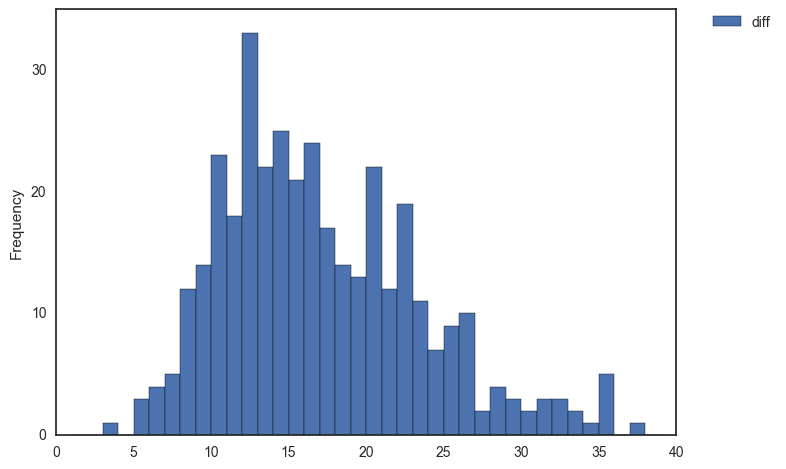

In [16]:
ax = sf['diff'].plot.hist(bins=np.arange(0, 40, 1))
axis_tick_frequency(ax, 'y', 10)
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


## Deterministic Sampling

In [17]:
top = pd.read_csv('data/top_movies.csv')

In [18]:
top.head()

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012


Let's make a deterministic sample. We will sample every 20th top grossing movie

In [19]:
interval = 20
sample = arange(0, len(top), interval)

In [20]:
df = pd.DataFrame()
for i in sample:
    df = df.append(top.ix[i, :])

In [21]:
df

,Gross,Gross (Adjusted),Studio,Title,Year
0,906723418.0,9.067234e+08,Buena Vista (Disney),Star Wars: The Force Awakens,2015.0
20,402111870.0,4.689381e+08,Paramount/Dreamworks,Transformers: Revenge of the Fallen,2009.0
40,322719944.0,4.080906e+08,Paramount/Dreamworks,Shrek the Third,2007.0
60,291710957.0,3.930331e+08,Buena Vista (Disney),"The Chronicles of Narnia: The Lion, the Witch ...",2005.0
80,242829261.0,3.503507e+08,Universal,Bruce Almighty,2003.0
100,198676459.0,1.757788e+09,MGM,Gone with the Wind,1939.0
120,167780960.0,3.628229e+08,Buena Vista (Disney),Three Men and a Baby,1987.0
140,125049125.0,3.698653e+08,UA,Rocky III,1982.0
160,94213184.0,3.532612e+08,Paramount,Saturday Night Fever,1977.0
180,52223306.0,3.483432e+08,Columbia,Funny Girl,1968.0


## Probability Sampling

A *population* is the set of all elements from whom a sample will be drawn. A *probability sample* is one for which it is possible to calculate, before the sample is drawn, the chance with which any subset of elements will enter the sample. In a probability sample, all elements need not have the same chance of being chosen.

Now let's do probabilistic sampling of the top movies. When we do a probabilistic sample like this, we call it a **"systematic sample."**


In [27]:
start = np.random.choice(np.arange(interval))
sample = np.arange(start, len(top), interval)

df = pd.DataFrame()
for i in sample:
    df = df.append(top.ix[i, :])

In [28]:
df

,Gross,Gross (Adjusted),Studio,Title,Year
15,415004880.0,454156300.0,Buena Vista (Disney),Toy Story 3,2010.0
35,336530303.0,425554300.0,Sony,Spider-Man 3,2007.0
55,300531751.0,328883800.0,Sum.,The Twilight Saga: Eclipse,2010.0
75,250690539.0,475165100.0,Sony,Men in Black,1997.0
95,215409889.0,347693200.0,Paramount,Mission: Impossible II,2000.0
115,174803506.0,401961400.0,Paramount,Crocodile Dundee,1986.0
135,134966411.0,686626300.0,Paramount,The Godfather,1972.0
155,102308889.0,613853300.0,Fox,Butch Cassidy and the Sundance Kid,1969.0
175,63595658.0,650760000.0,UA,Thunderball,1965.0
195,21750000.0,386173500.0,Columbia,The Caine Mutiny,1954.0


#### Question:
- What is the probability that the *Rush Hour 2* ends up in the sample we have systematically chosen?

#### Answer:
- This is depends solely on the the chance that the first movie chosen from the dataset is *The Dark Knight Rises* and that has a chance of 1 in 20, i.e., 5%. 


### Uniform Sample
A uniform sample is a sample drawn at random without replacements

In [149]:
def sample(num_sample, top, with_replacement=False):
    """
    Create a random sample from a table
    
    Attributes
    ---------
    num_sample: int
    top: dataframe
    with_replacement: boolean
    
    Returns a random subset of table index
    """
    df_index = []
    lst = np.arange(0, len(top), 1)

    for i in np.arange(0, num_sample, 1):

        # pick randomly from the whole table
        sample_index = np.random.choice(lst)

        if with_replacement:
            # store index
            df_index.append(sample_index)
        else:
            # remove the choice that was selected
            lst = np.setdiff1d(lst,[sample_index])
            df_index.append(sample_index)
            
    return df_index


In [150]:
index_ = sample(35, top, with_replacement=True)
df = top.ix[index_, :]
df.sort_values(by='Gross', ascending=0)

,Title,Studio,Gross,Gross (Adjusted),Year
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
12,The Hunger Games: Catching Fire,Lionsgate,424668047,444697400,2013
13,Pirates of the Caribbean: Dead Man's Chest,Buena Vista (Disney),423315812,562266800,2006
16,Iron Man 3,Buena Vista (Disney),409013994,424632700,2013
18,Spider-Man,Sony,403706375,604517300,2002
19,Jurassic Park,Universal,402453882,799721000,1993
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011
29,Inside Out,Buena Vista (Disney),356461711,375723400,2015
61,The Empire Strikes Back,Fox,290475067,854171500,1980


In [151]:
index_ = sample(25, top)
df = top.ix[index_, :]
df.sort_values(by='Gross', ascending=0)

,Title,Studio,Gross,Gross (Adjusted),Year
10,Shrek 2,Dreamworks,441226247,618143100,2004
14,The Lion King,Buena Vista (Disney),422783777,775573900,1994
20,Transformers: Revenge of the Fallen,Paramount/Dreamworks,402111870,468938100,2009
23,Finding Nemo,Buena Vista (Disney),380843261,535802700,2003
26,Spider-Man 2,Sony,373585825,523381100,2004
28,Despicable Me 2,Universal,368061265,407978700,2013
55,The Twilight Saga: Eclipse,Sum.,300531751,328883800,2010
56,The Twilight Saga: New Moon,Sum.,296623634,338517700,2009
60,"The Chronicles of Narnia: The Lion, the Witch ...",Buena Vista (Disney),291710957,393033100,2005
61,The Empire Strikes Back,Fox,290475067,854171500,1980


## Dice

In [152]:
die = pd.DataFrame()
die["Face"] = [1,2,3,4,5,6]

In [153]:
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


We can simulate the act of rolling dice by just pulling out rows

In [168]:
index_ = sample(3, die, with_replacement=True)
df = die.ix[index_, :]
df

,Face
2,3
3,4
0,1


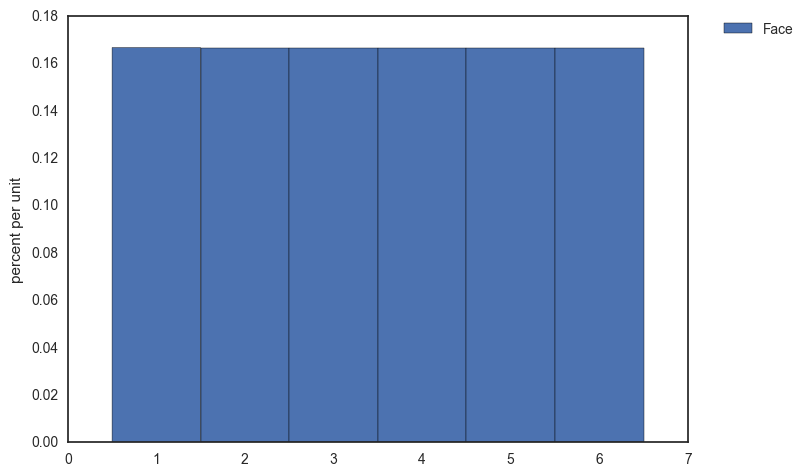

In [203]:
dice_bins = np.arange(0.5, 7, 1) 

# norm the histogram to give us the density scale
die.plot.hist(bins=dice_bins, normed=True)
pyplt.ylabel('percent per unit')
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


In [217]:
def dice_hist(n):
    """Construct histogram of n simulated dice rolls
    
    Attributes
    -----------
    n: int 
    """
    
    if n > 0:
        dice_bins = np.arange(0.5, 7, 1) 
        index_ = sample(n, die, with_replacement=True)
        df = die.ix[index_, :]
        df.plot.hist(bins=dice_bins, normed=True)
        pyplt.ylabel('percent per unit')
        pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    else:
        raise ValueError('n has to be greater than 0')


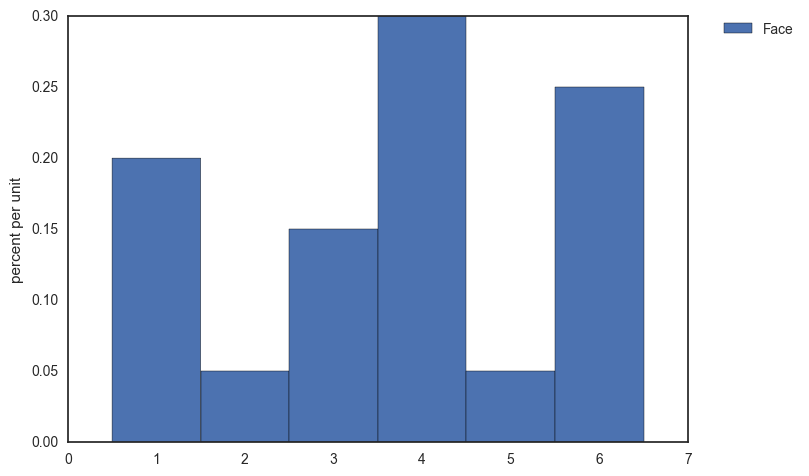

In [221]:
dice_hist(20)